# Лабораторная работа № 2
## Выполнил студент группы ИУ5-24М Лычагин Д.
### Датасет Время марафона

In [4]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [13]:
data = pd.read_csv(marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [14]:
data

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59
...,...,...,...,...
37245,18,M,04:24:24,09:32:57
37246,36,M,04:35:43,09:33:28
37247,51,M,04:22:35,09:33:40
37248,55,W,04:58:06,10:00:40


In [15]:
len(data)

37250

## Устранение пропусков в данных

In [16]:
data_wn[12000:13000].loc[data_wn['age'][12000:13000] != np.NaN, 'age'] = -10
data_wn['age'][12000:13000] = data_wn['age'][12000:13000].replace(-10,np.NaN)
data_wn['age'][12000:13000]

12000   NaN
12001   NaN
12002   NaN
12003   NaN
12004   NaN
         ..
12995   NaN
12996   NaN
12997   NaN
12998   NaN
12999   NaN
Name: age, Length: 1000, dtype: float64

In [17]:
data_mean_by_gender = data_wn[['gender', 'age']].groupby('gender').mean()

In [18]:
data_wn['age'] = data_wn['age'].fillna(data_wn.groupby('gender')['age'].transform('mean'))

## Кодирование категориальных признаков

In [19]:
#Создание пропусков
data_wn = data
data_wn[7000:8000].loc[data_wn['gender'][7000:8000] != np.NaN, 'gender'] = np.NaN
data_wn['gender'][7000:8000]

7000    NaN
7001    NaN
7002    NaN
7003    NaN
7004    NaN
       ... 
7995    NaN
7996    NaN
7997    NaN
7998    NaN
7999    NaN
Name: gender, Length: 1000, dtype: object

## Добавление 2 полей в секундах

In [31]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv(r'C:\Users\lycha\.jupyter\marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [32]:
data['split_sec'] = data['split'].astype(np.int64) / 1E9
data['final_sec'] = data['final'].astype(np.int64) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


In [33]:
data['gender'].unique()

array(['M', 'W'], dtype=object)

## Определение, к какому гендеру принадлежит

In [34]:
data_wn_col = ['gender','split_sec', 'final_sec', 'age']

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit(data['gender'])
data['gender'] = le.transform(data['gender'])

In [36]:
np.unique(data['gender'])
#le.inverse_transform([0, 1])

array([0, 1])

In [37]:
data['gender'][7000:8000] = np.NaN
data['gender'][7000:8000]

7000   NaN
7001   NaN
7002   NaN
7003   NaN
7004   NaN
        ..
7995   NaN
7996   NaN
7997   NaN
7998   NaN
7999   NaN
Name: gender, Length: 1000, dtype: float64

## Количество пустых строчек

In [38]:
data_c = data[data_wn_col]
data_c.isnull().sum()

gender       1000
split_sec       0
final_sec       0
age             0
dtype: int64

In [40]:
import warnings
from sklearn.impute import KNNImputer
warnings.filterwarnings("ignore")

In [41]:
knnimputer = KNNImputer(
    n_neighbors=1, 
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False, 
)
knnimpute_data = knnimputer.fit_transform(data_c)
knnimpute_data_imputed = pd.DataFrame(knnimpute_data, columns=data_c.columns)
knnimpute_data_imputed.head()

,gender,split_sec,final_sec,age
0,0.0,3938.0,7731.0,33.0
1,0.0,3986.0,7768.0,32.0
2,0.0,4009.0,7842.0,31.0
3,0.0,3976.0,8025.0,38.0
4,0.0,3992.0,8039.0,31.0


In [42]:
knnimpute_data_imputed[7000:8000]

,gender,split_sec,final_sec,age
7000,0.0,6321.0,13742.0,43.0
7001,1.0,6273.0,13743.0,53.0
7002,0.0,6709.0,13743.0,50.0
7003,0.0,6096.0,13743.0,22.0
7004,0.0,6057.0,13744.0,42.0
...,...,...,...,...
7995,0.0,5888.0,14106.0,54.0
7996,0.0,6295.0,14107.0,29.0
7997,0.0,6303.0,14107.0,34.0
7998,0.0,6392.0,14108.0,47.0


## Нормализация данных

In [47]:
import scipy.stats as stats

In [48]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

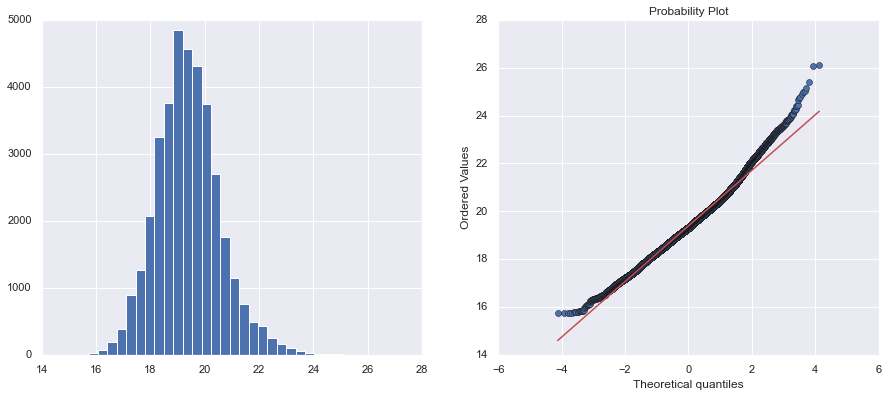

In [49]:
data['split_sec_exp3'] = data['split_sec']**(0.333)
diagnostic_plots(data, 'split_sec_exp3')